#### Preliminary comparison of mass balance for 4 oil types

To-do: 
   - Update Floating mass to Susan's method

In [1]:
import sys
sys.path.insert(1, '/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from midoss_utils import *

In [2]:
results_path = Path('/Users/rmueller/Projects/MIDOSS/results/EightCases_forHaibo/05jun2015/')
akns_sro = results_path/'resOilOutput_akns.sro'
bunker_sro = results_path/'resOilOutput_bunkerc.sro'
diesel_sro = results_path/'resOilOutput_diesel.sro'
dilbit_sro = results_path/'resOilOutput_dilbit.sro'

#### Plot diesel

In [3]:
# load all the values that we need
mass = load_sro(diesel_sro,['MEvaporated', 'MDispersed', 'MDissolved','MBio','MassOil','VolOilBeached','Density'])
mass = mass.rename(columns={"MassOil":"MFloating"})

/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),
/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:65: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


In [4]:
# create a vector of values with initial spill mass
spill_volume = 10000 #m3
initial_density = mass.Density[0] #kg/m3
mass['MInitial'] = [spill_volume * initial_density for i in range(len(mass.Density))]

# calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
mass['MBeached'] = [row['VolOilBeached']*row['Density'] for day, row in mass.iterrows()]

# net mass of weathered oil
mass['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in mass.iterrows()]

In [5]:
mass = mass.drop(['VolOilBeached','Density'], axis=1)

mass[:0]

,MEvaporated,MDispersed,MDissolved,MBio,MFloating,datetime,MInitial,MBeached,MTotal
days_since_spill,,,,,,,,,
0.0,0.0,0.0,0.0,0.0,8.250500e+06,2015-06-05 00:30:00,8.250500e+06,0.0,8.250500e+06


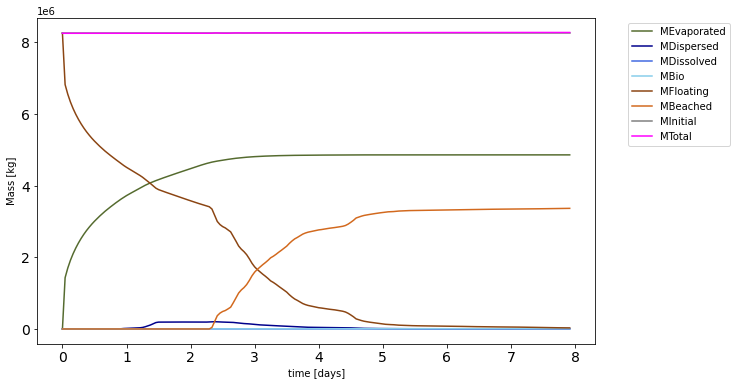

In [6]:
color_dict = {"MEvaporated": "darkolivegreen",
              "MDispersed": "darkblue", 
              "MDissolved": "royalblue", 
              "MBio": "skyblue",
              "MFloating": "saddlebrown", 
             "MBeached": "chocolate", 
             "MInitial": "grey",
             "MTotal":"magenta"}

cols_plot = ["MEvaporated", "MDispersed",  "MDissolved", "MBio", "MFloating", "MBeached", "MInitial","MTotal"]

ax = mass[cols_plot].plot(
    linewidth=1.5,
    color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
    figsize = (10,6),
    fontsize = 14
)
ax.set_ylabel('Mass [kg]')
ax.set_xlabel('time [days]')
ax.legend(bbox_to_anchor=(1.05, 1))

#### Plot Dilbit

/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),
/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:65: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


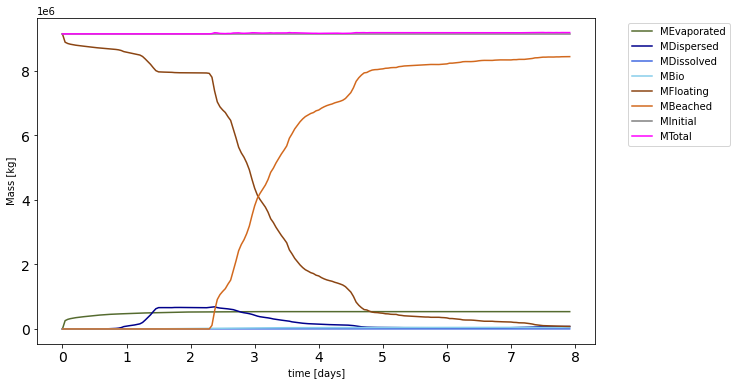

In [7]:
# load all the values that we need
mass = load_sro(dilbit_sro,['MEvaporated', 'MDispersed', 'MDissolved','MBio','MassOil','VolOilBeached','Density'])
mass = mass.rename(columns={"MassOil":"MFloating"})

# create a vector of values with initial spill mass
spill_volume = 10000 #m3
initial_density = mass.Density[0] #kg/m3
mass['MInitial'] = [spill_volume * initial_density for i in range(len(mass.Density))]

# calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
mass['MBeached'] = [row['VolOilBeached']*row['Density'] for day, row in mass.iterrows()]

# net mass of weathered oil
mass['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in mass.iterrows()]

mass = mass.drop(['VolOilBeached','Density'], axis=1)

mass[:0]

color_dict = {"MEvaporated": "darkolivegreen",
              "MDispersed": "darkblue", 
              "MDissolved": "royalblue", 
              "MBio": "skyblue",
              "MFloating": "saddlebrown", 
             "MBeached": "chocolate", 
             "MInitial": "grey",
             "MTotal":"magenta"}

cols_plot = ["MEvaporated", "MDispersed",  "MDissolved", "MBio", "MFloating", "MBeached", "MInitial","MTotal"]

ax = mass[cols_plot].plot(
    linewidth=1.5,
    color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
    figsize = (10,6),
    fontsize = 14
)
ax.set_ylabel('Mass [kg]')
ax.set_xlabel('time [days]')
ax.legend(bbox_to_anchor=(1.05, 1))


#### Plot AKNS

/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),
/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:65: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


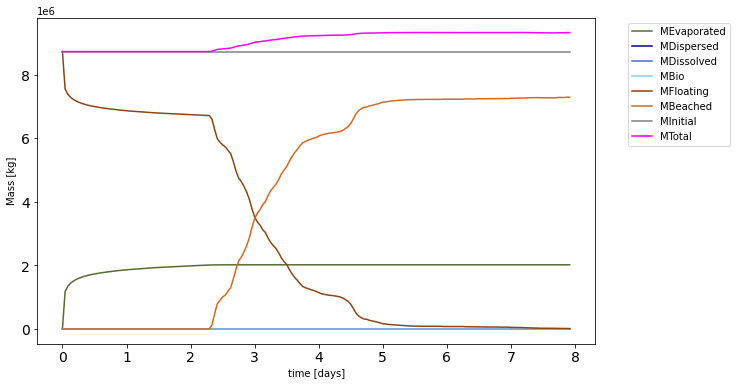

In [8]:
# load all the values that we need
mass = load_sro(akns_sro,['MEvaporated', 'MDispersed', 'MDissolved','MBio','MassOil','VolOilBeached','Density'])
mass = mass.rename(columns={"MassOil":"MFloating"})

# create a vector of values with initial spill mass
spill_volume = 10000 #m3
initial_density = mass.Density[0] #kg/m3
mass['MInitial'] = [spill_volume * initial_density for i in range(len(mass.Density))]

# calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
mass['MBeached'] = [row['VolOilBeached']*row['Density'] for day, row in mass.iterrows()]

# net mass of weathered oil
mass['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in mass.iterrows()]

mass = mass.drop(['VolOilBeached','Density'], axis=1)

mass[:0]

color_dict = {"MEvaporated": "darkolivegreen",
              "MDispersed": "darkblue", 
              "MDissolved": "royalblue", 
              "MBio": "skyblue",
              "MFloating": "saddlebrown", 
             "MBeached": "chocolate", 
             "MInitial": "grey",
             "MTotal":"magenta"}

cols_plot = ["MEvaporated", "MDispersed",  "MDissolved", "MBio", "MFloating", "MBeached", "MInitial","MTotal"]

ax = mass[cols_plot].plot(
    linewidth=1.5,
    color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
    figsize = (10,6),
    fontsize = 14
)
ax.set_ylabel('Mass [kg]')
ax.set_xlabel('time [days]')
ax.legend(bbox_to_anchor=(1.05, 1))

### bunkerc

/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:37: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),
/Users/rmueller/Projects/MIDOSS/analysis-rachael/scripts/midoss_utils.py:65: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pandas.datetime(numpy.int(YY), numpy.int(MM), numpy.int(DD),


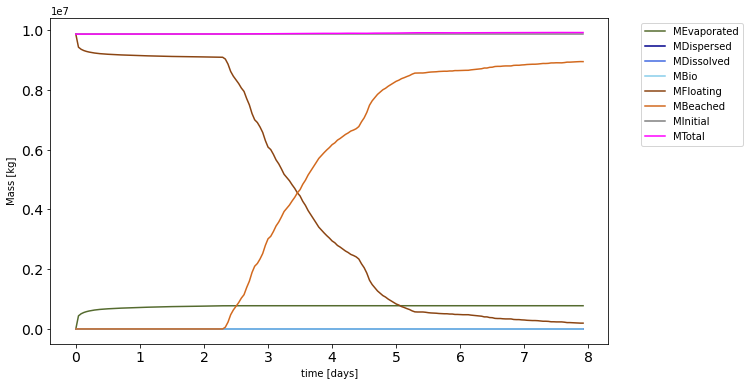

In [9]:
# load all the values that we need
mass = load_sro(bunker_sro,['MEvaporated', 'MDispersed', 'MDissolved','MBio','MassOil','VolOilBeached','Density'])
mass = mass.rename(columns={"MassOil":"MFloating"})

# create a vector of values with initial spill mass
spill_volume = 10000 #m3
initial_density = mass.Density[0] #kg/m3
mass['MInitial'] = [spill_volume * initial_density for i in range(len(mass.Density))]

# calculate mass of beached oil (this step will eventually be inherent to the "load_sro" script)
mass['MBeached'] = [row['VolOilBeached']*row['Density'] for day, row in mass.iterrows()]

# net mass of weathered oil
mass['MTotal'] = [row['MEvaporated']+row['MDispersed']+row['MDissolved']+row['MBio']+row['MFloating']+row['MBeached'] for day, row in mass.iterrows()]

mass = mass.drop(['VolOilBeached','Density'], axis=1)

mass[:0]

color_dict = {"MEvaporated": "darkolivegreen",
              "MDispersed": "darkblue", 
              "MDissolved": "royalblue", 
              "MBio": "skyblue",
              "MFloating": "saddlebrown", 
             "MBeached": "chocolate", 
             "MInitial": "grey",
             "MTotal":"magenta"}

cols_plot = ["MEvaporated", "MDispersed",  "MDissolved", "MBio", "MFloating", "MBeached", "MInitial","MTotal"]

ax = mass[cols_plot].plot(
    linewidth=1.5,
    color = [color_dict.get(column_name,'#333333') for column_name in cols_plot],
    figsize = (10,6),
    fontsize = 14
)
ax.set_ylabel('Mass [kg]')
ax.set_xlabel('time [days]')
ax.legend(bbox_to_anchor=(1.05, 1))